In this notebook I process the data from trying to overfit 100 data points of CN + isopentane data set to see if the atom decomposed neural network with ACSF works correctly. The data was generated on blue crystal p4 in this directory:
`/mnt/storage/home/sa16246/calculations/debugging`

I used OAMNN from the forces branch of Aglaia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
predicted = [ 1.41987378e+03,  7.09708191e+02,  1.44934967e+02,  4.54717407e+01,
        2.76718597e+01,  6.25097656e+01, -4.44068604e+01, -8.03665161e+00,
       -3.22156219e+01,  2.66954041e+00,  8.30505371e+00, -5.37659302e+01,
        1.22383881e+01, -1.34210205e+01,  3.05389038e+02,  6.87920380e+01,
       -5.10939026e+01, -2.33551025e+01, -4.40886078e+01,  4.25331116e+01,
       -3.98269653e+00, -7.03009949e+01, -4.17466431e+01, -1.39239044e+01,
        4.88670959e+01, -6.98829346e+01, -1.57006424e+02, -1.57482117e+02,
       -7.36068726e+01, -3.21243286e+01, -7.23511658e+01, -8.34184875e+01,
       -4.98497772e+01, -2.86393738e+01, -3.97850189e+01, -1.24685928e+02,
       -1.12487396e+02, -1.05542084e+02, -5.20513916e+01, -1.04481201e+01,
       -7.01751709e+01, -3.06965942e+01, -2.48129883e+01,  3.67187500e-01,
       -3.79770508e+01, -8.12029419e+01, -4.90481262e+01, -1.49364014e+01,
        1.69039917e+01,  1.12247925e+01, -7.12030029e+00, -1.47398987e+01,
       -4.28338013e+01, -8.34192352e+01, -5.53395996e+01,  1.27597046e+00,
        2.07230835e+01,  3.31227844e+02,  8.16969604e+01,  5.35331726e+01,
        6.01663208e+01,  7.71402588e+01,  3.05523834e+01, -3.01464844e+01,
       -2.67763672e+01, -3.62516785e+00,  7.29025879e+01,  3.25788452e+02,
        2.18233032e+01, -1.26759796e+01, -1.23757324e+01, -2.24186707e+01,
       -3.72414474e+01, -8.03475342e+01, -1.33411148e+02, -1.01309067e+02,
       -8.50988464e+01, -9.58004608e+01, -8.24652863e+01, -9.12675018e+01,
       -5.51680756e+01, -3.06163025e+01, -6.80690613e+01, -9.94086761e+01,
       -8.26541290e+01, -8.91087341e+01, -4.81219482e+00, -2.64147949e+01,
       -7.76934509e+01, -9.01110840e+01, -9.55691376e+01, -7.77684021e+01,
       -7.74801941e+01, -5.80441895e+01, -4.58492432e+01, -5.35552979e+01,
       -6.34059753e+01, -9.23054199e+01, -9.98625336e+01, -6.03399353e+01]

In [3]:
original = [ 1.41986501e+03,  7.14043637e+02,  1.45858148e+02,  5.06256976e+01,
        2.94818449e+01,  6.67169526e+01, -4.26987457e+01, -9.56397949e+00,
       -3.06640273e+01,  0.00000000e+00,  1.00455942e+01, -5.59926726e+01,
        1.60839077e+01,  1.59908482e+00,  3.04466258e+02,  6.53103119e+01,
       -5.12587355e+01, -2.47119680e+01, -4.40918481e+01,  4.25155696e+01,
       -4.77191308e+00, -7.02345907e+01, -4.20896723e+01, -1.43021737e+01,
        4.64570206e+01, -6.90073779e+01, -1.57686602e+02, -1.57363754e+02,
       -8.81417271e+01, -3.00730517e+01, -7.19957003e+01, -8.21567018e+01,
       -6.45007238e+01, -2.68108223e+01, -3.97650732e+01, -1.00167216e+02,
       -1.10713024e+02, -1.06048446e+02, -5.71334374e+01, -4.41946693e+01,
       -7.00186270e+01, -3.37787025e+01, -2.27025095e+01,  2.21196902e-01,
       -3.81003399e+01, -8.11665683e+01, -4.90764496e+01, -1.45747465e+01,
        2.01332670e+01,  1.11190142e+01, -7.12784358e+00, -1.86880543e+01,
       -4.25869227e+01, -7.05896713e+01, -5.23212891e+01,  1.29458374e+00,
        5.63686565e+01,  3.30624226e+02,  8.18630094e+01,  5.29774131e+01,
        5.72125848e+01,  7.06627087e+01,  3.06073999e+01, -3.21524897e+01,
       -2.84316893e+01,  3.99497838e+00,  6.71731755e+01,  3.31195367e+02,
        2.23077914e+01, -1.84511574e+01, -2.37374845e+01, -2.73688278e+01,
       -3.87208826e+01, -8.03584321e+01, -1.32749249e+02, -9.26886407e+01,
       -8.51191492e+01, -9.35309687e+01, -8.57499717e+01, -8.96948632e+01,
       -5.54768813e+01, -3.23539059e+01, -7.22656529e+01, -1.03788749e+02,
       -1.00110045e+02, -8.42011343e+01, -2.30247873e+01, -2.69072824e+01,
       -5.16274623e+01, -9.00814268e+01, -9.55753336e+01, -7.48454822e+01,
       -8.17390747e+01, -5.87084069e+01, -4.35097355e+01, -4.67684418e+01,
       -6.17055807e+01, -9.21445584e+01, -1.11479004e+02, -6.02201078e+01]

In [4]:
d = {'original': original, 'predicted': predicted}
df = pd.DataFrame(data=d)

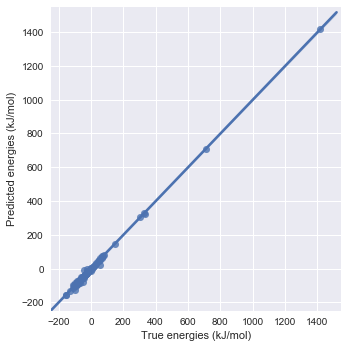

In [5]:
sns.lmplot(x='original', y='predicted', data=df, scatter_kws={"s": 50})
plt.xlim(-250,1550)
plt.ylim(-250,1550)
plt.xlabel('True energies (kJ/mol)')
plt.ylabel('Predicted energies (kJ/mol)')
plt.savefig("corr_overfit.png", dpi=200)
plt.show()

In [6]:
diff = np.absolute(np.asarray(original) - np.asarray(predicted))
mae = np.sum(diff)/100
print(mae)

4.058457418279998


In [7]:
my_data = np.genfromtxt('/Users/walfits/Downloads/run_0-tag-cost.csv', delimiter=',')

In [8]:
my_data.shape

(901, 3)

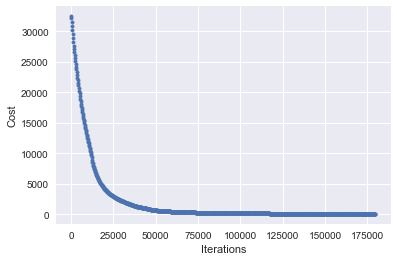

In [9]:
plt.scatter(x=my_data[:, 1], y=my_data[:, 2], marker='.')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.savefig("cost_overfit.png", dpi=200)
plt.show()